# 사이파이 패키지로 검정하기

# 1. 이항검정

In [13]:
mu0 = 0.5
N = 10

np.random.seed(0)
rv = sp.stats.bernoulli(mu0).rvs(N)
x = np.bincount(rv)[1]

p_value = sp.stats.binom_test(x, n=N, alternative='two-sided')
print(f'유의확률 : {p_value}')
print(f'귀무가설 기각 못 함')

유의확률 : 0.3437499999999999
귀무가설 기각 못 함


In [22]:
N = 100
mu0 = 0.5

np.random.seed(0)
sample = sp.stats.bernoulli(mu0).rvs(N)
t = np.count_nonzero(sample)

p_value2 = sp.stats.binom_test(t, n=N, alternative='two-sided')
print(f'유의확률 : {p_value2}')

유의확률 : 0.9204107626128206


0.052947052947052944


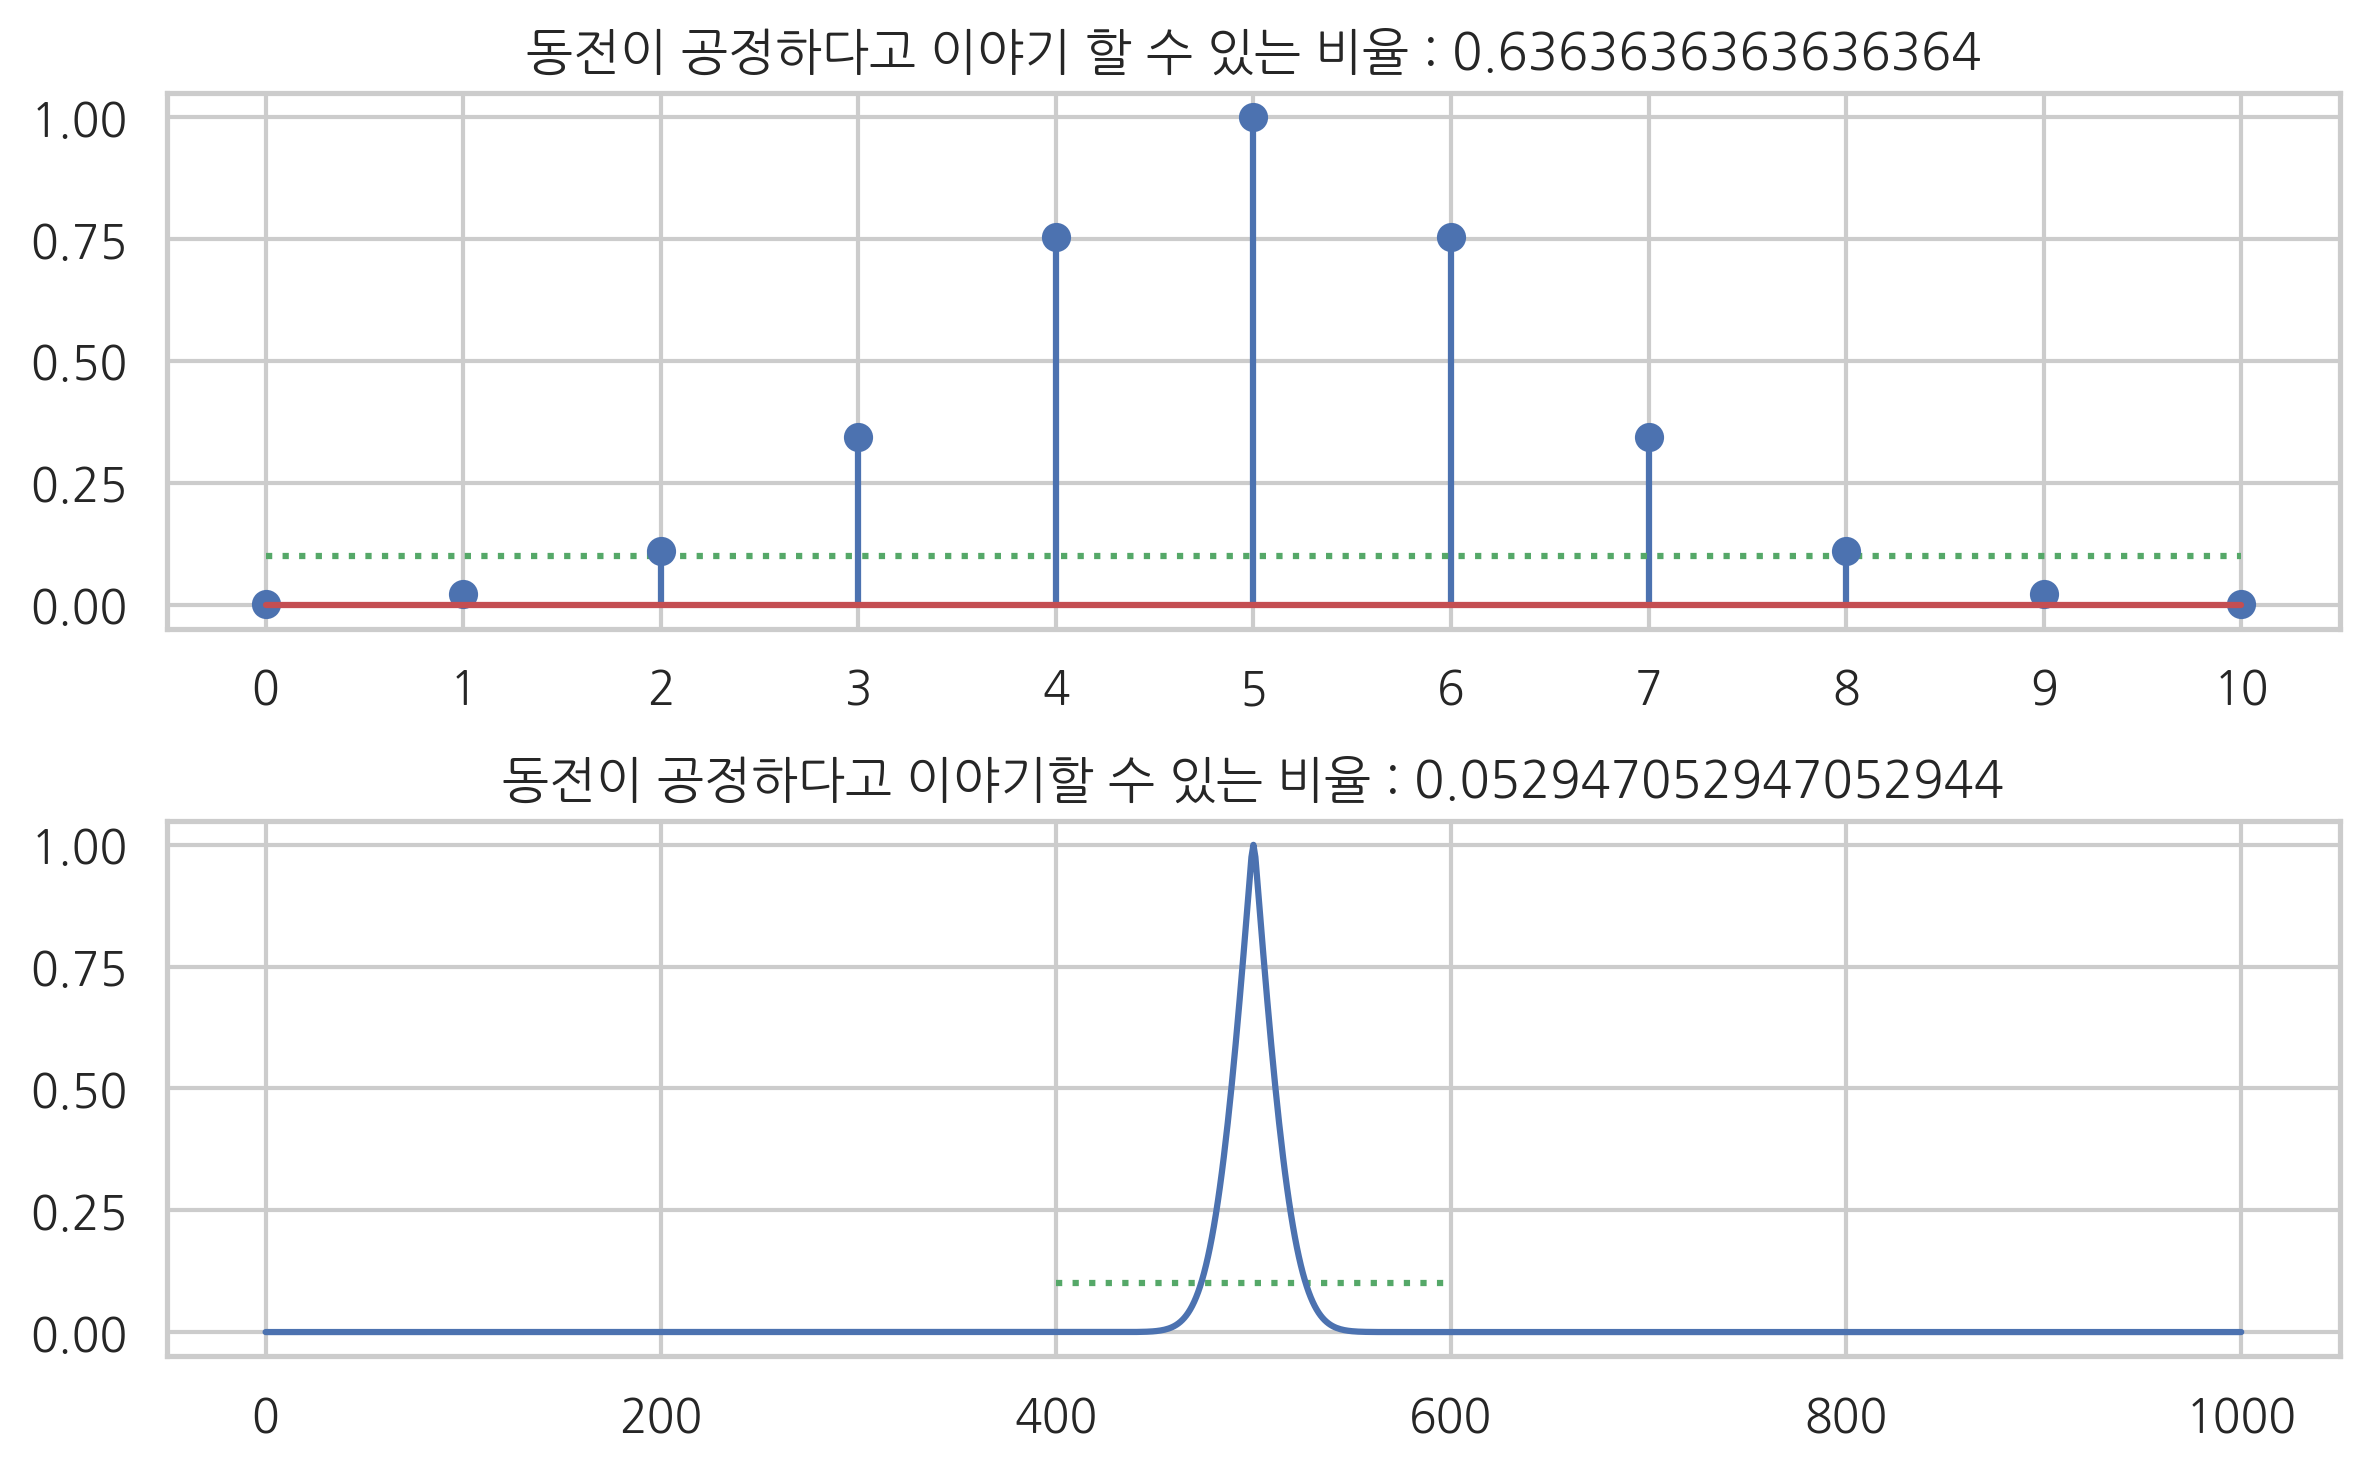

In [68]:
# 9.5.1 연습문제 
# 1. 
xx = np.arange(0,11)
p_values = [sp.stats.binom_test(x, n=10, alternative='two-sided') for x in xx]
plt.subplot(211)
plt.stem(xx, p_values)
plt.xticks(xx)
plt.hlines(0.1, xmin=0, xmax=10, colors='g', ls=':')
per = 7/11
plt.title(f'동전이 공정하다고 이야기 할 수 있는 비율 : {per}')

plt.subplot(212)
N = 1000
mu0 = 0.5

xx2 = np.arange(1001)
p_values2 = [sp.stats.binom_test(x, n=N, alternative='two-sided') for x in xx2]
plt.plot(xx2, p_values2)
plt.hlines(0.1, xmin=400, xmax=600, colors='g', ls=':')

r = [p for p in p_values2 if p > 0.1]
per = len(r)/1001
print(f'{per}')
plt.title(f'동전이 공정하다고 이야기할 수 있는 비율 : {per}')

plt.tight_layout()
plt.show()

In [78]:
fair_range2 = np.where(np.array(p_values2) > 0.1)
fair_start, fair_end = fair_range2[0][0], fair_range2[0][-1]
fair_start, fair_end

(474, 526)

In [81]:
# 9.5.2 연습문제 
import seaborn as sns
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [108]:
X = df[df['sex'] == 'Female'][['smoker']]
vc = X.value_counts()

# H_{a} : \mu < 0.5
# 좌측검정 유의확률 사용

t = vc[1]
p_value = sp.stats.binom_test(t, n=len(X.values), alternative='less')
print(f'유의확률 : {p_value}')
print(f'5% 유의수준에서 귀무가설 기각, 대립가설 채택 : 비흡연자가 흡연자보다 많다고 할 수 있다')

유의확률 : 0.015709055116923068
5% 유의수준에서 귀무가설 기각, 대립가설 채택 : 비흡연자가 흡연자보다 많다고 할 수 있다


In [129]:
# 2.
# H_{a} : \mu < 0.5
dinner = df[df['time']== 'Dinner']
smoker = dinner[dinner['sex']=='Female']['smoker']
yes = smoker.value_counts()[1]

p_value3 = sp.stats.binom_test(yes, n=len(smoker), alternative='less')
print(f'유의확률 : {p_value3}')
print(f'귀무가설 채택, 대립가설이 사실이라고 주장하기엔 증거가 부족하다')

유의확률 : 0.2442278346899461
귀무가설 채택, 대립가설이 사실이라고 주장하기엔 증거가 부족하다


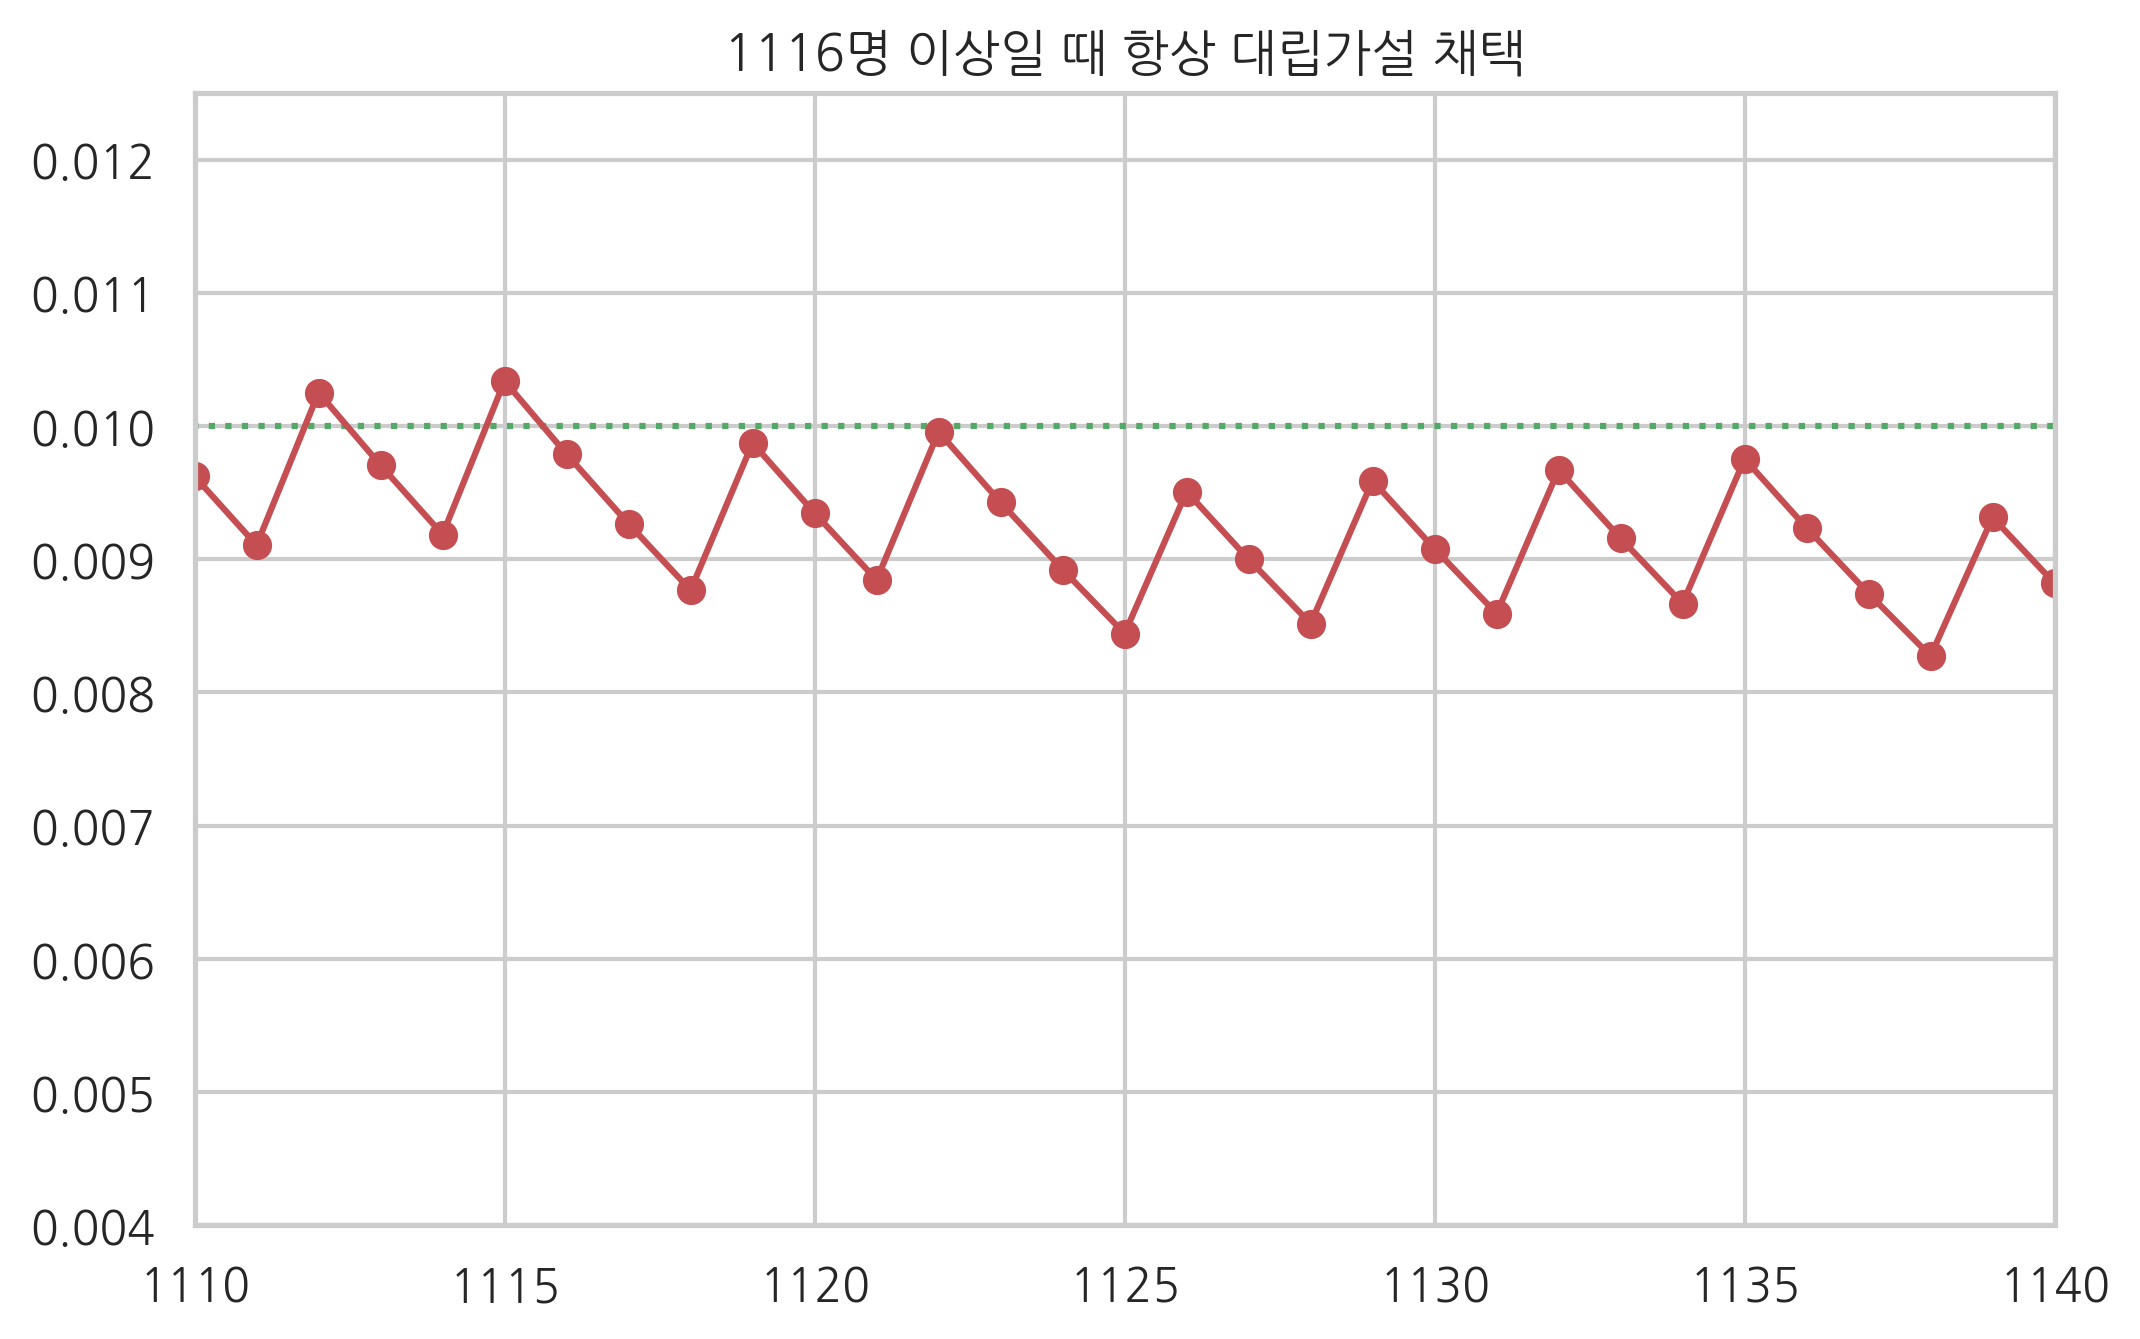

In [222]:
# 9.5.3 연습문제 

nn = np.arange(0,2001)
p_values = [sp.stats.binom_test(int(np.round(n*0.7)), n=n, p=2/3, alternative='greater') for n in nn]

plt.plot(nn, p_values, 'ro-')
plt.hlines(0.01, xmin=0, xmax=2000, colors='g', ls=':')
plt.ylim(0.004,0.0125)
plt.xlim(1110, 1140)
plt.title('1116명 이상일 때 항상 대립가설 채택')
plt.show()

# 카이제곱검정

In [238]:
N = 10
mu0=[0.25]*4
k = 4

np.random.seed(0)
x = np.random.choice(k,N, p = mu0)
n = np.bincount(x)

sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

In [241]:
N = 100
k = 4
mu_0 = np.array([0.35, 0.3, 0.2, 0.15])
np.random.seed(0)
x = np.random.choice(k, N, p=mu_0)
n = np.bincount(x, minlength=4)

sp.stats.chisquare(n)

Power_divergenceResult(statistic=16.56, pvalue=0.0008703471978912127)

In [251]:
n = 5
k = 6

np.random.seed(0)
x = np.random.choice(k, n, p=[0]*5+[1])
n = np.bincount(x, minlength=6)

sp.stats.chisquare(n)[1]

0.00013933379118562602

# 카이제곱 독립검정

In [259]:
# 9.5.5 연습문제 
sample = np.array(
    [[4,16,20],
    [23,18,19]])
result = sp.stats.chi2_contingency(sample)[1]
print(f'유의확률 : {result}')
print(f'귀무가설 기각, 대립가설 채택')
print(f'베르누이확률변수와 카테고리확률변수 간 상관관계가 있다고 말할 수 있다')

유의확률 : 0.00704786570249751
귀무가설 기각, 대립가설 채택
베르누이확률변수와 카테고리확률변수 간 상관관계가 있다고 말할 수 있다


# 단일표본 Z 검정

In [265]:
mu0 = 0
sigma2 = 1

rv = sp.stats.norm(loc=mu0, scale=sigma2).rvs(10, random_state=0)

z = np.mean(rv)/sigma2*np.sqrt(10) # 검정통계량값

p_value = (1-sp.stats.norm().cdf(z))*2
p_value

0.019604406021683562

In [273]:
N = 100
mu0 = 0
sigma2 = 1

rv = sp.stats.norm(loc=mu0, scale=1).rvs(N, random_state=0)

def z_test(rv, sigma2, N) : 
    z = np.mean(rv)/sigma2*np.sqrt(N)
    if z >= 0 : 
        p_value = (1-sp.stats.norm().cdf(z))*2
    elif z < 0 : 
        p_value = sp.stats.norm().cdf(z)*2
    return z, p_value

result = z_test(rv, sigma2, N)[1]
print(f'유의확률 : {result}')
print(f'귀무가설 채택')

유의확률 : 0.5497864508624168
귀무가설 채택


# 단일표본 t 검정

In [277]:
N = 100
mu0 = 0

rv = sp.stats.norm().rvs(N, random_state=0)

sp.stats.ttest_1samp(rv, popmean=mu0)

Ttest_1sampResult(statistic=0.5904283402851698, pvalue=0.5562489158694675)

# 독립표본 t 검정

Text(0.5, 1.0, '서로 독립인 두 정규분포에서 나온 표본1, 2')

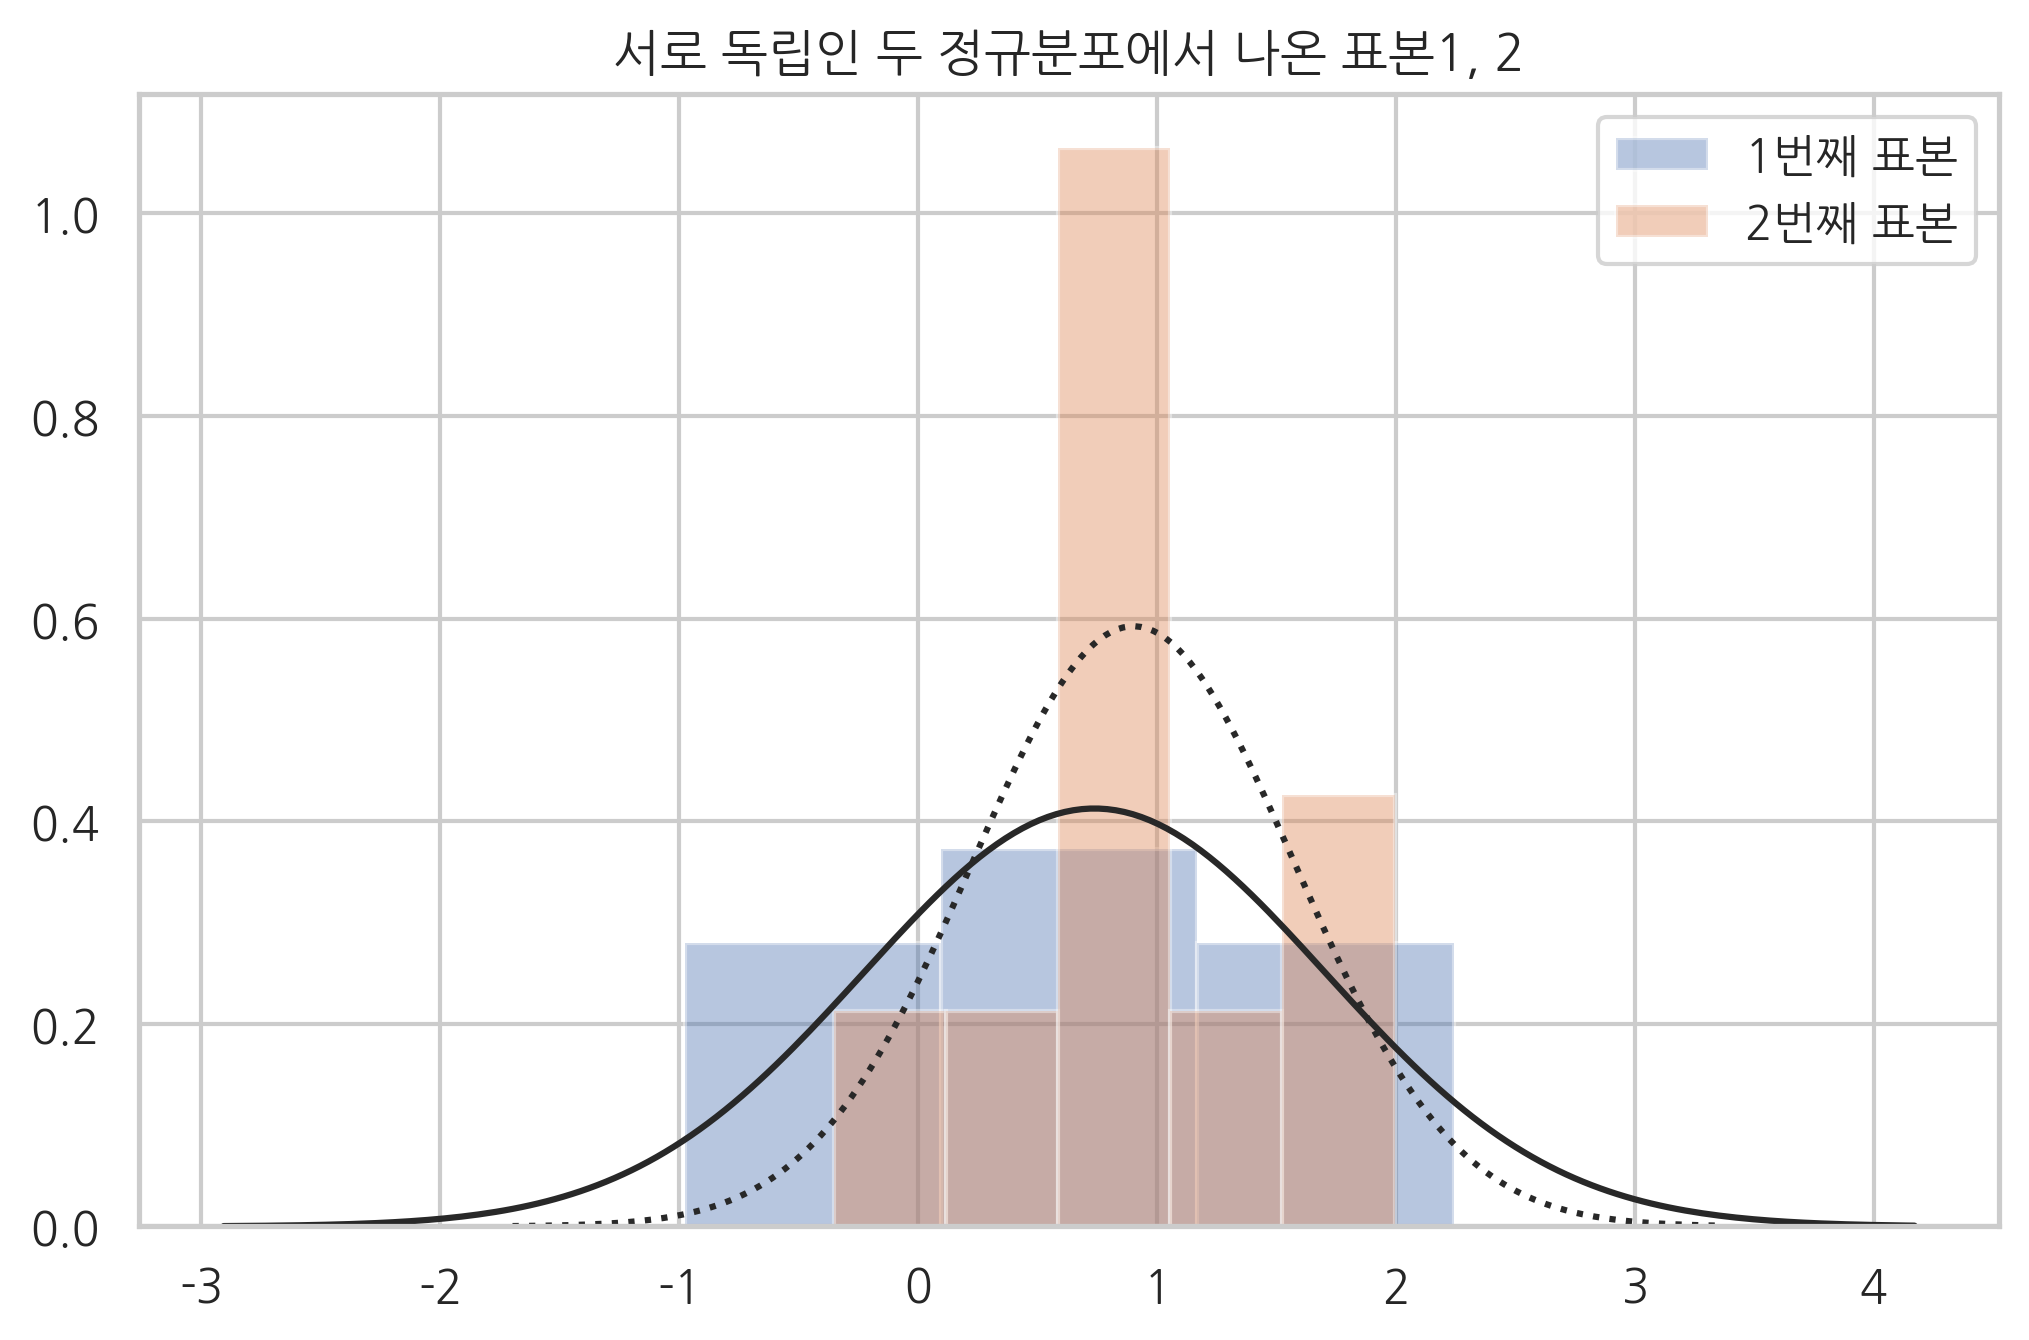

In [286]:
n1 = 10
mu1 = 0
sigma21 = 1

n2 = 10
mu2 = 0.5
sigma22 = 1

np.random.seed(0)
rs1 = sp.stats.norm(loc=mu1, scale=sigma21).rvs(n1)
rs2 = sp.stats.norm(loc=mu2, scale=sigma22).rvs(n2)

ax = sns.distplot(rs1, kde=False, fit=sp.stats.norm, label='1번째 표본')
ax = sns.distplot(rs2, kde=False, fit=sp.stats.norm, label='2번째 표본')
ax.lines[1].set_linestyle(':')

plt.legend()
plt.title('서로 독립인 두 정규분포에서 나온 표본1, 2')

In [289]:
np.mean(rs1), np.mean(rs2)

(0.7380231707288347, 0.9006460151624349)

In [292]:
sp.stats.ttest_ind(rs1, rs2, equal_var=False)
print(f'2종 오류 발생')

2종 오류 발생


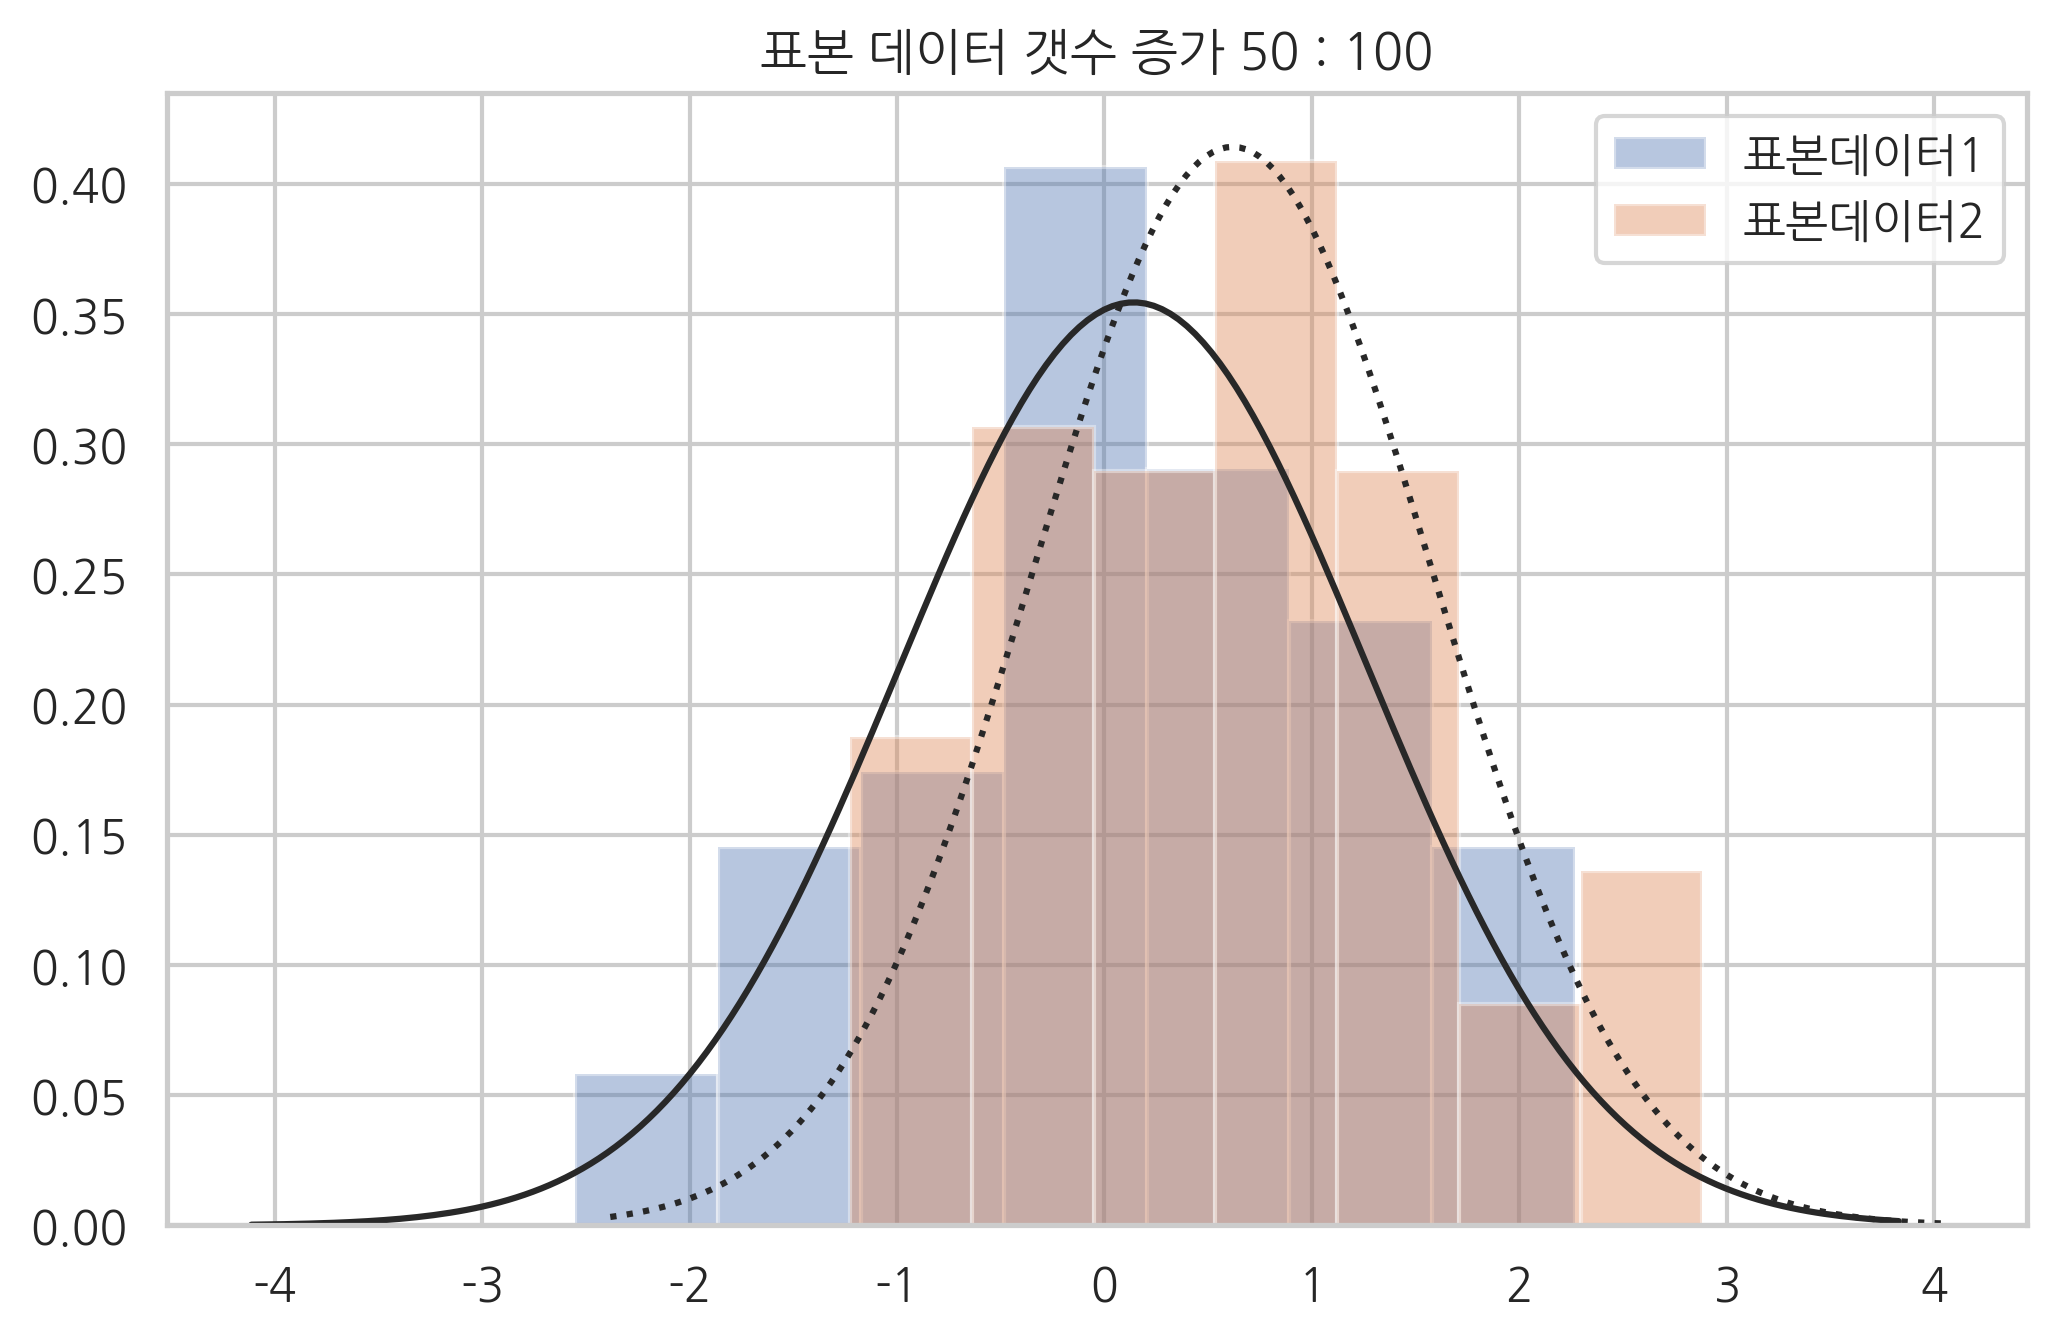

In [397]:
n1 = 50
mu1 = 0
sigma21 = 1

n2 = 100
mu2 = 0.5
sigma22 = 1

np.random.seed(0)
x1 = sp.stats.norm(loc=mu1, scale=sigma21).rvs(n1)
x2 = sp.stats.norm(loc=mu2, scale=sigma22).rvs(n2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label='표본데이터1')
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label='표본데이터2')
ax.lines[1].set_linestyle(':')
plt.legend()
plt.title('표본 데이터 갯수 증가 50 : 100')
plt.show()

In [398]:
np.mean(x1), np.mean(x2)

(0.14055927231309787, 0.6177957994523524)

In [396]:
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-2.5427747064864556, pvalue=0.012800307550312669)

In [303]:
# 9.5.6 연습문제 
c1 = [80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80]
c2 = [80, 85, 70, 80, 35, 55, 80]

sp.stats.ttest_ind(c1, c2, equal_var=False)

Ttest_indResult(statistic=0.596519621317167, pvalue=0.562790180213766)

# 대응표본 t 검정

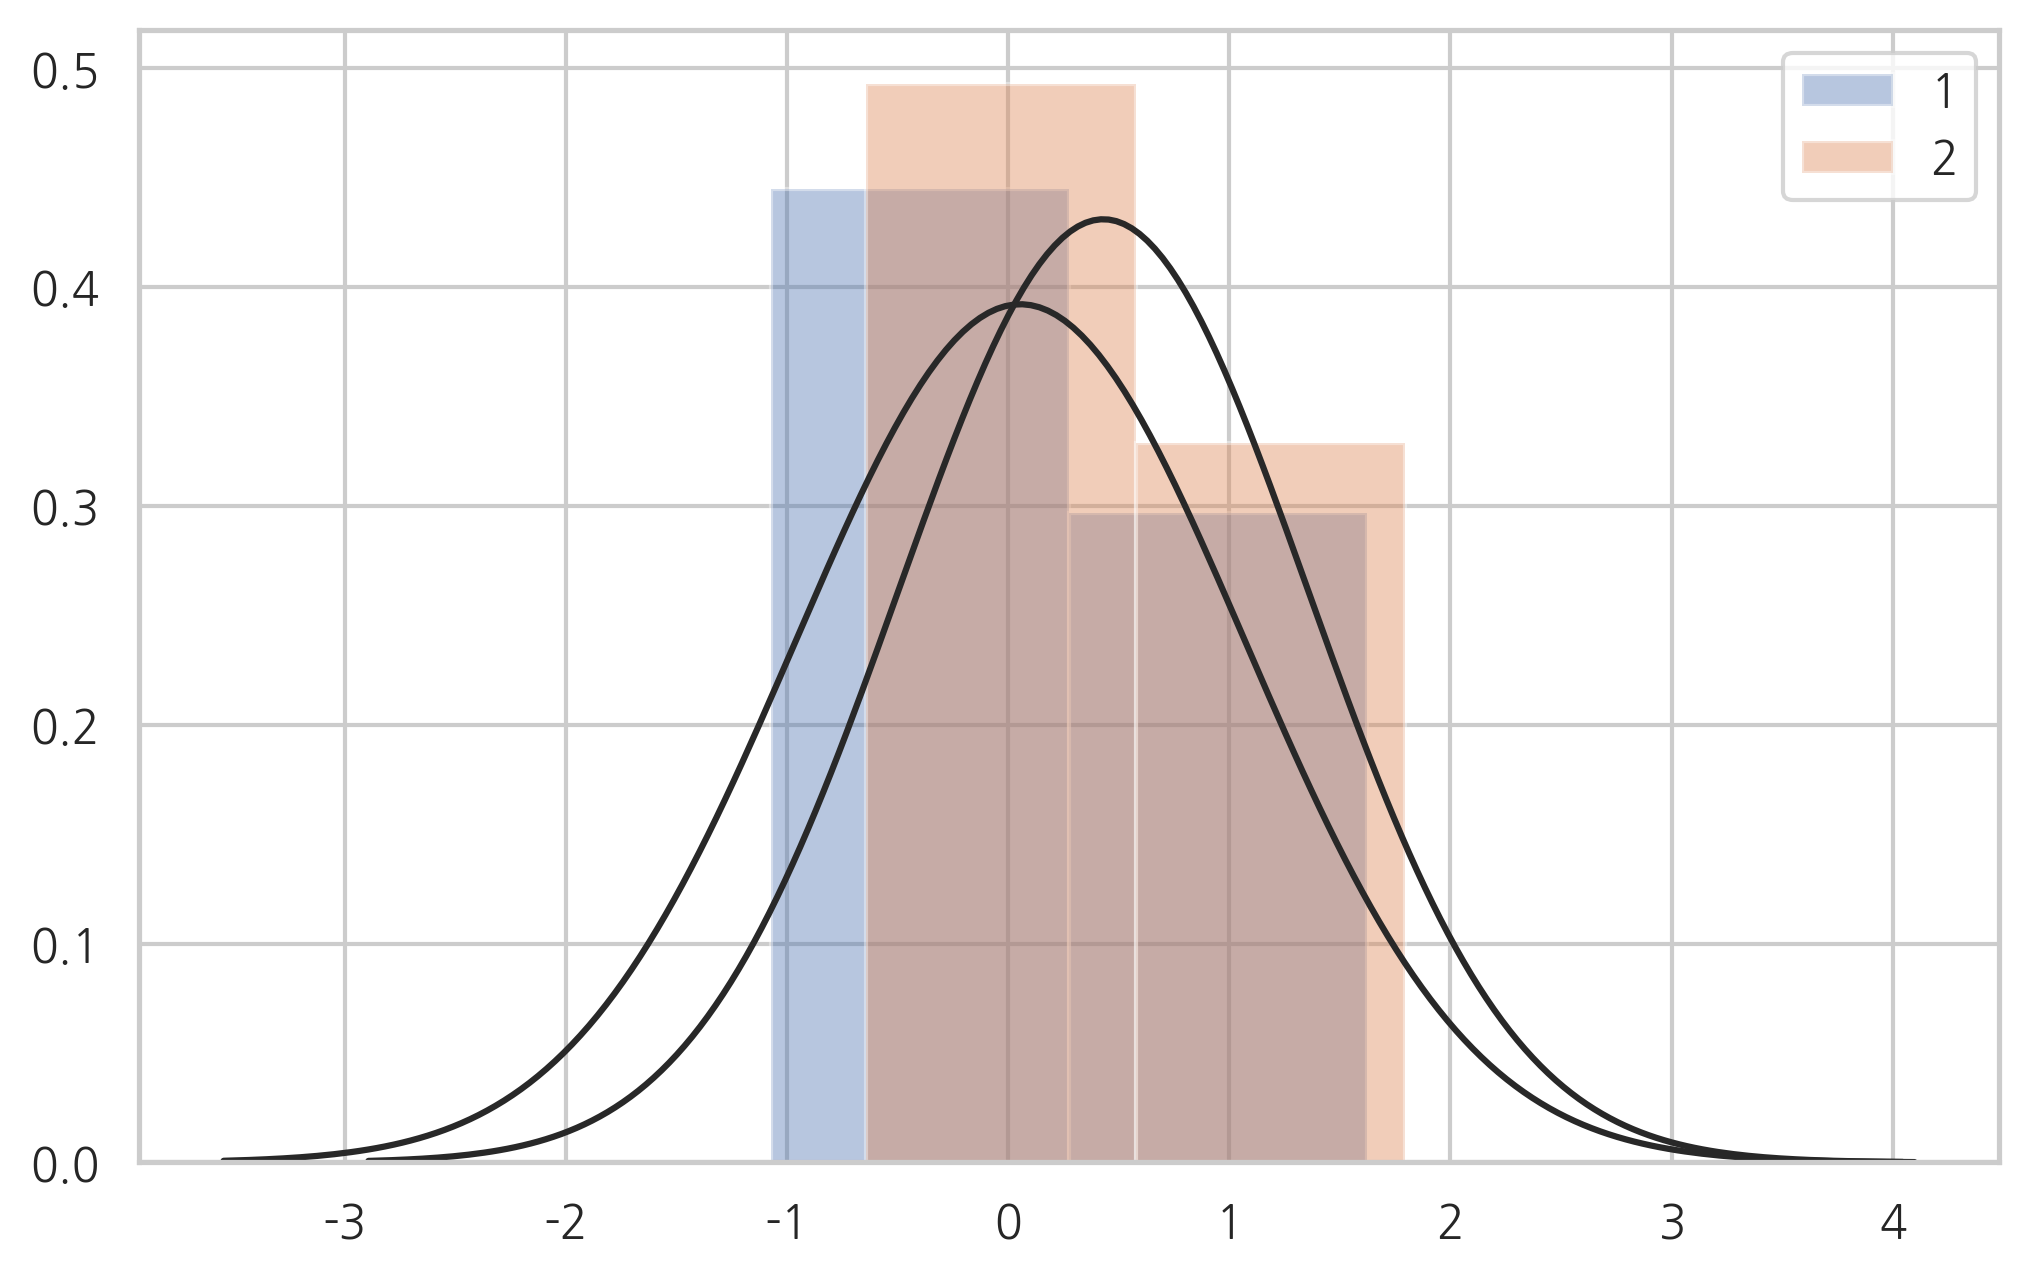

In [329]:
n = 5
mu_1 = 0
mu_2 = 0.4
np.random.seed(1)

x1 = sp.stats.norm(mu_1).rvs(n)
x2 = sp.stats.norm(mu_2, 0.1).rvs(n) + x1

sns.distplot(x1, kde=False, fit=sp.stats.norm, label='1')
sns.distplot(x2, kde=False, fit=sp.stats.norm, label='2')
plt.legend()
plt.show()


In [330]:
sp.stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-5.662482449248929, pvalue=0.0047953456833781305)

# 등분산검정

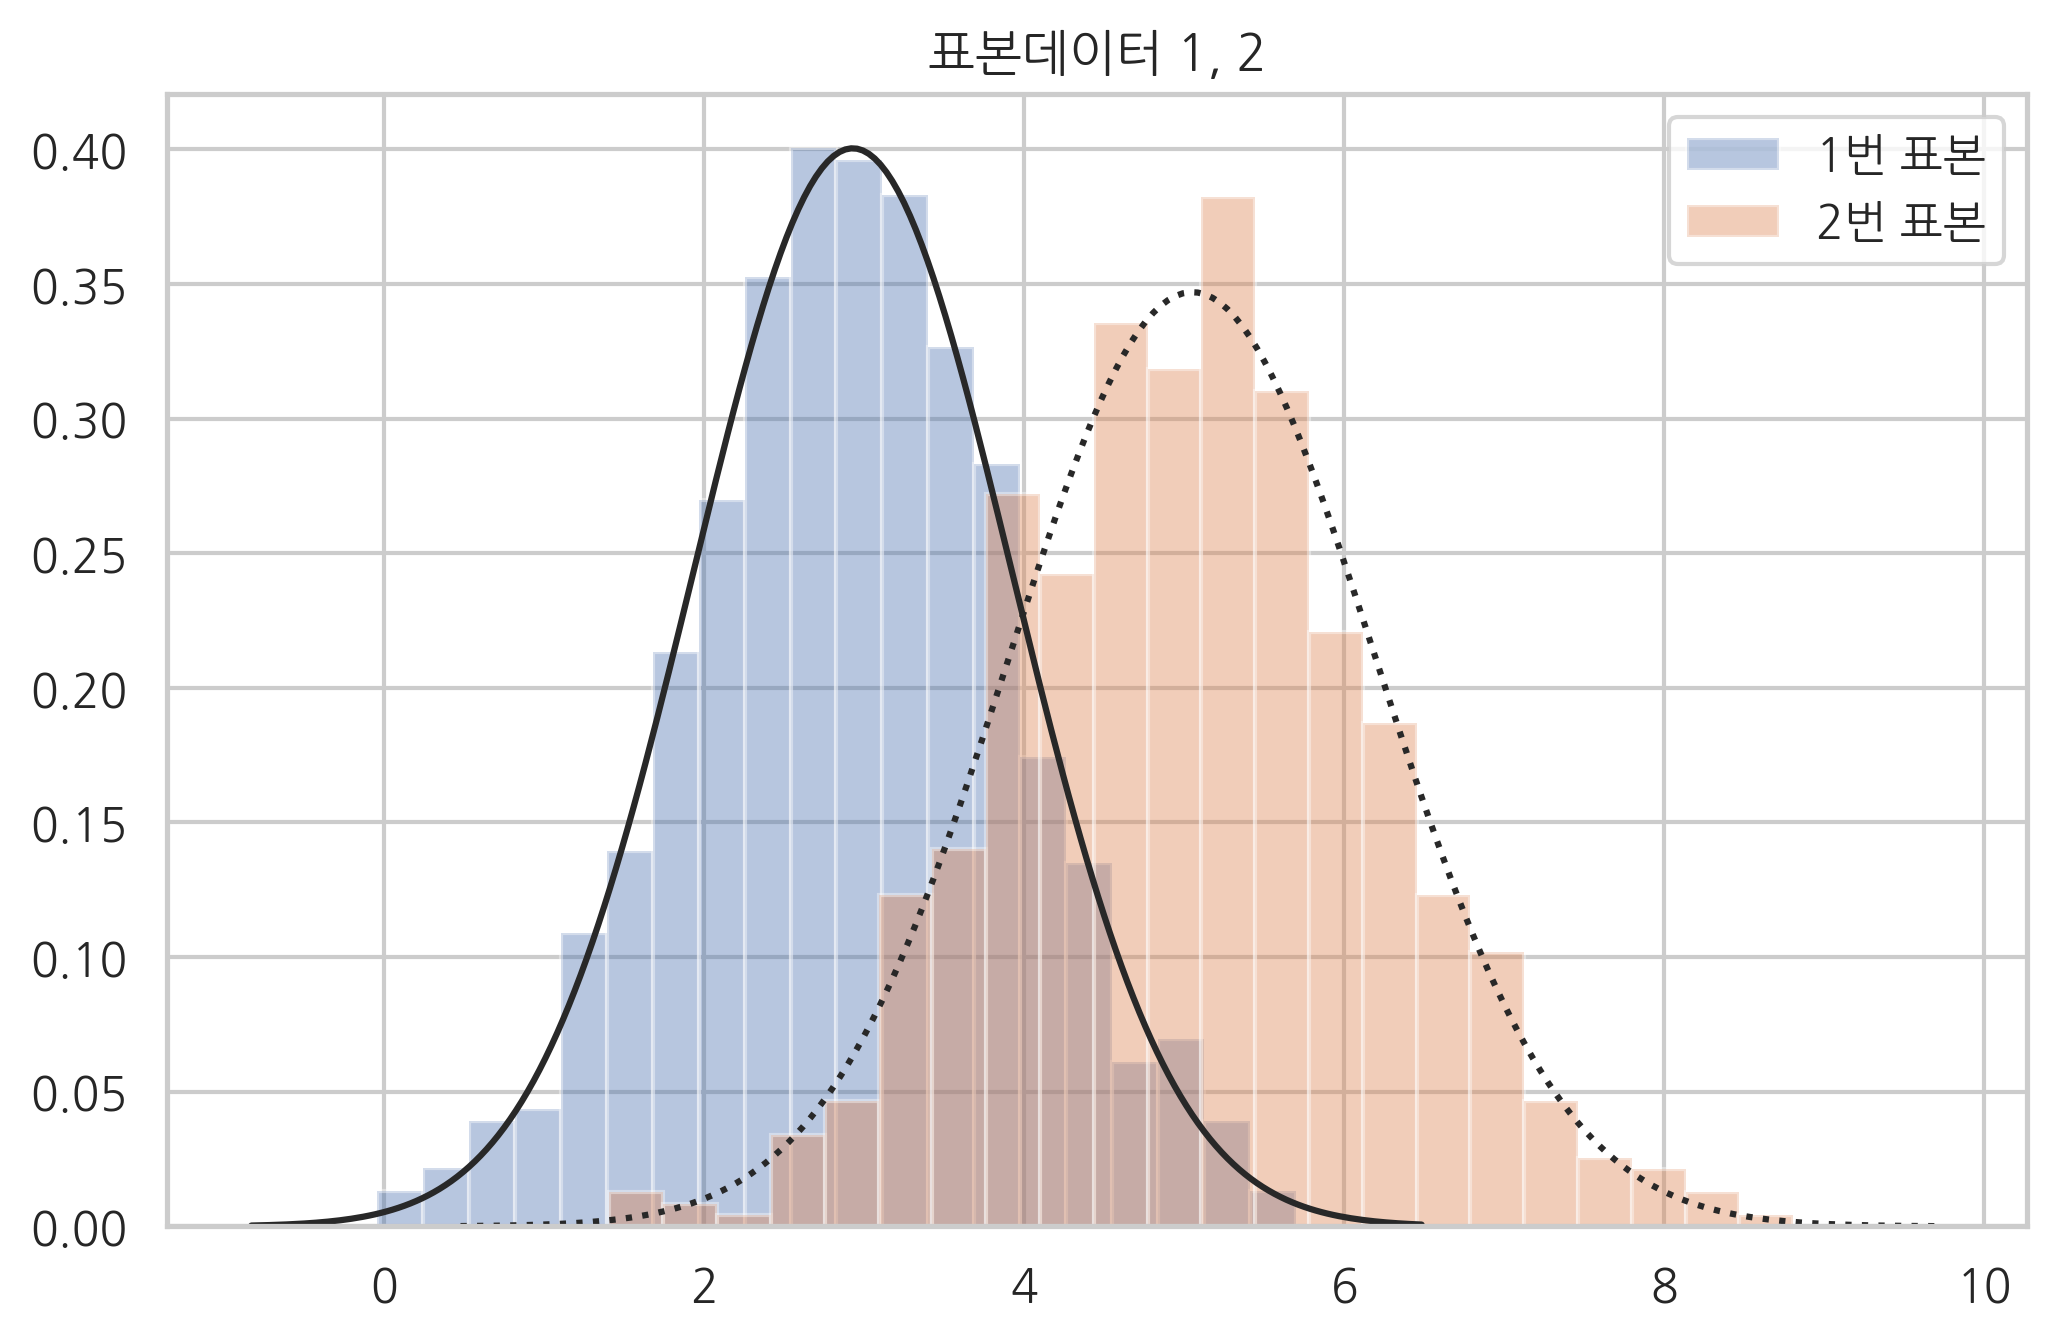

In [354]:
n1 = 800
n2 = 700

sigma1 = 1
sigma2 = 1.2

np.random.seed(0)
x1 = sp.stats.norm(3, sigma1).rvs(n1)
x2 = sp.stats.norm(5, sigma2).rvs(n2)

ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label='1번 표본')
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label='2번 표본')
ax.lines[1].set_linestyle(':')
plt.legend()
plt.title('표본데이터 1, 2')
plt.show()

In [355]:
print(x1.var(ddof=1), x2.var(ddof=1))
print(f'분산모수 다를 것 같다')

0.9941394887614771 1.3240342982563584
분산모수 다를 것 같다


In [356]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=15.343053846339838, pvalue=8.964992621009065e-05)

In [357]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=11.821107559476658, pvalue=0.0005856301367977482)

In [358]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=12.256042270504519, pvalue=0.00047735588309963205)

# 정규성검정

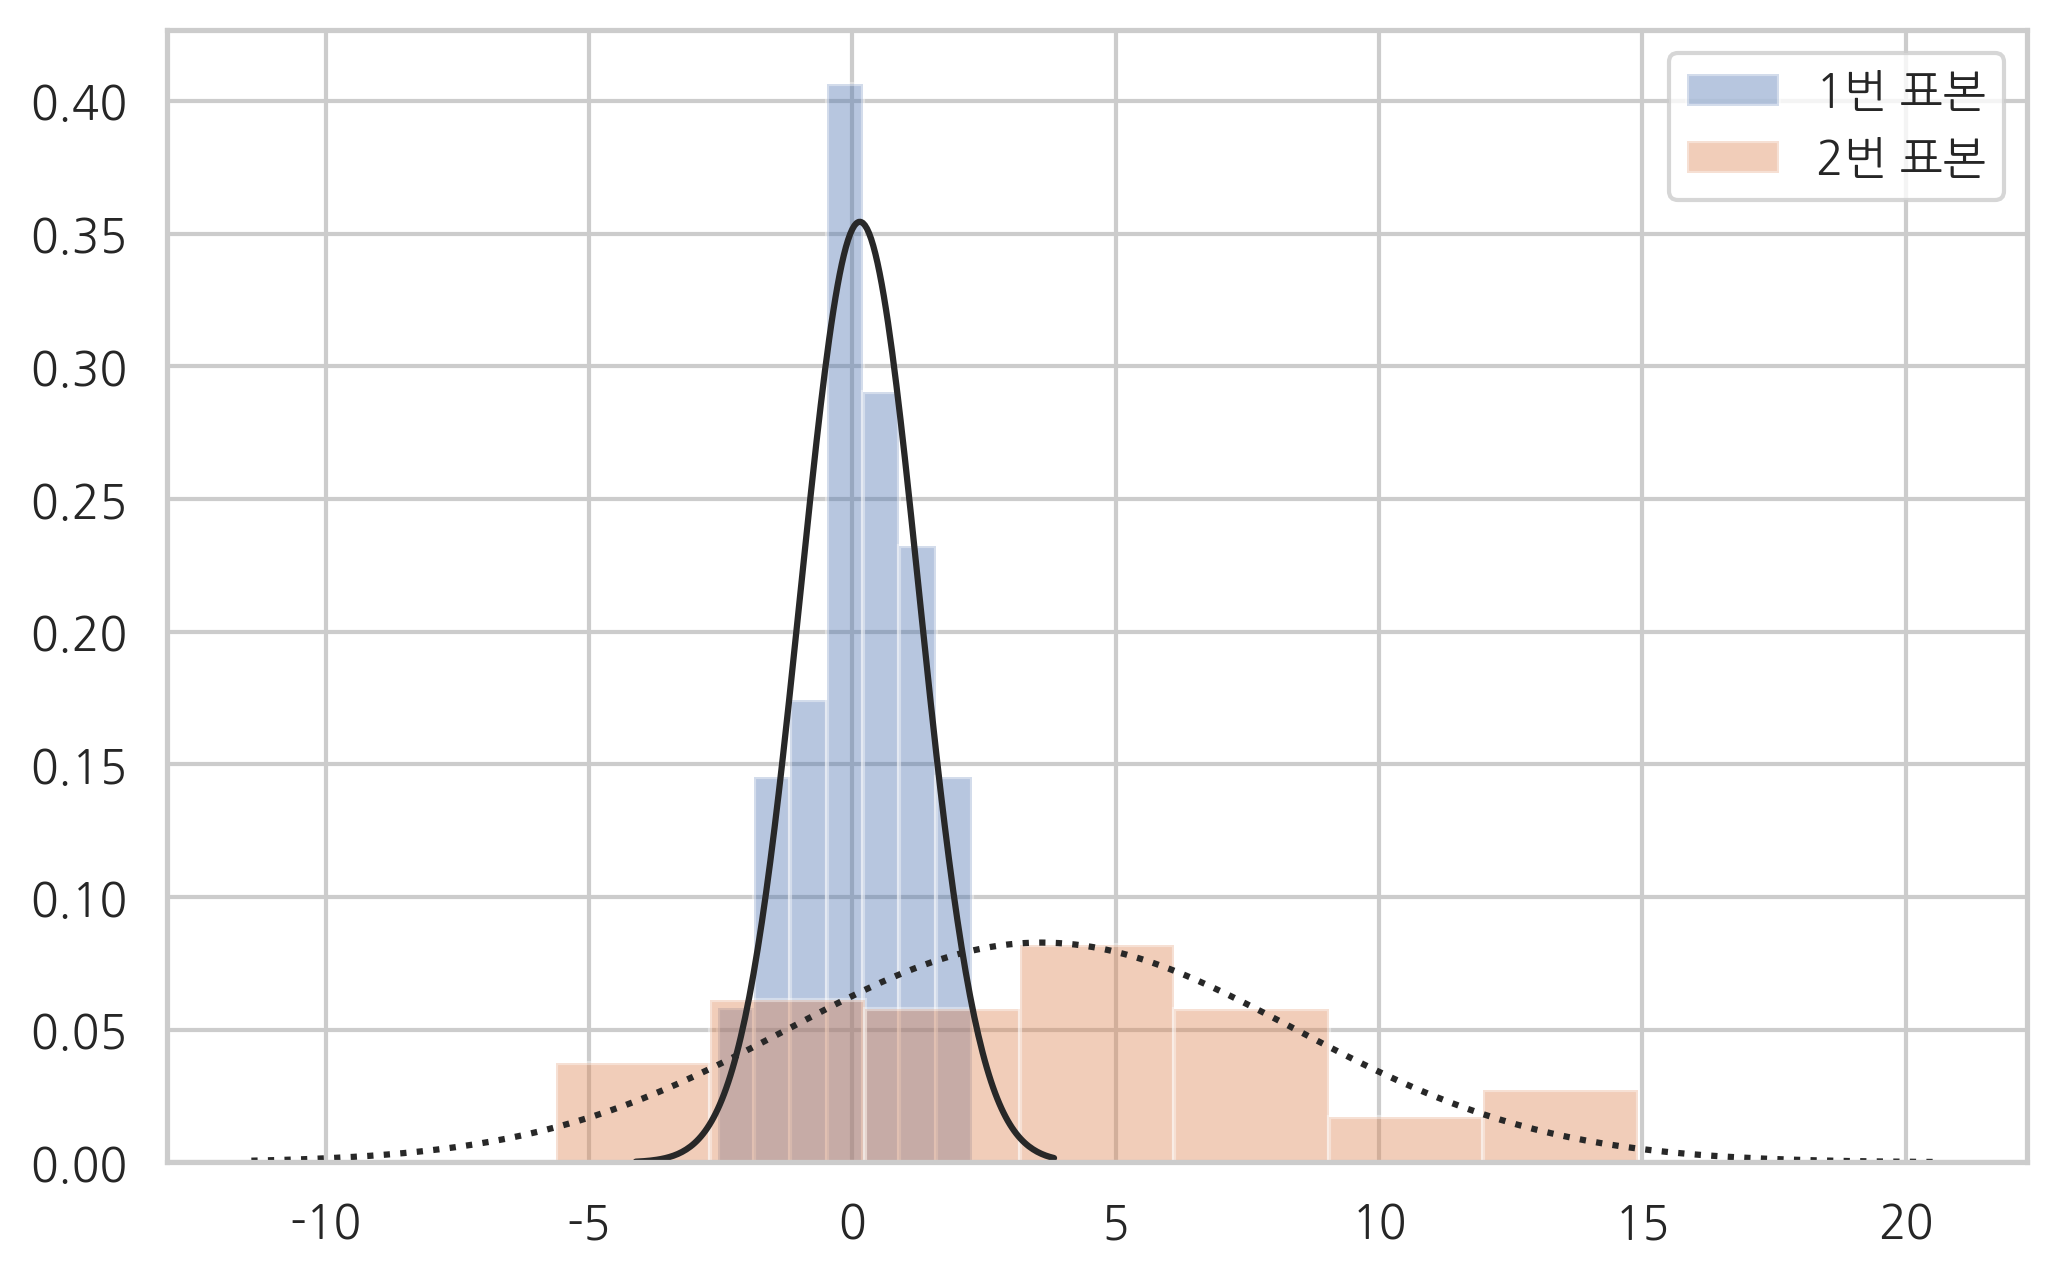

In [370]:
np.random.seed(0)

n1 = 50
n2 = 100

x1 = sp.stats.norm(0, 1).rvs(n1)
x2 = sp.stats.norm(3,5).rvs(n2)

ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label='1번 표본')
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label='2번 표본')
ax.lines[1].set_linestyle(':')

plt.legend()
plt.show()


In [371]:
sp.stats.ks_2samp(x1, x2)

KstestResult(statistic=0.57, pvalue=2.0129709010774377e-10)

In [391]:
x1 = sp.stats.norm(0, 1).rvs(10)

In [392]:
rvs = sp.stats.norm(0,2).rvs(1000)
sp.stats.ks_2samp(x1, rvs)

KstestResult(statistic=0.355, pvalue=0.12806575556290511)

In [394]:
a = [1,2,3,4,5]
np.where(np.array(a) >2)

(array([2, 3, 4]),)

# KS 검정

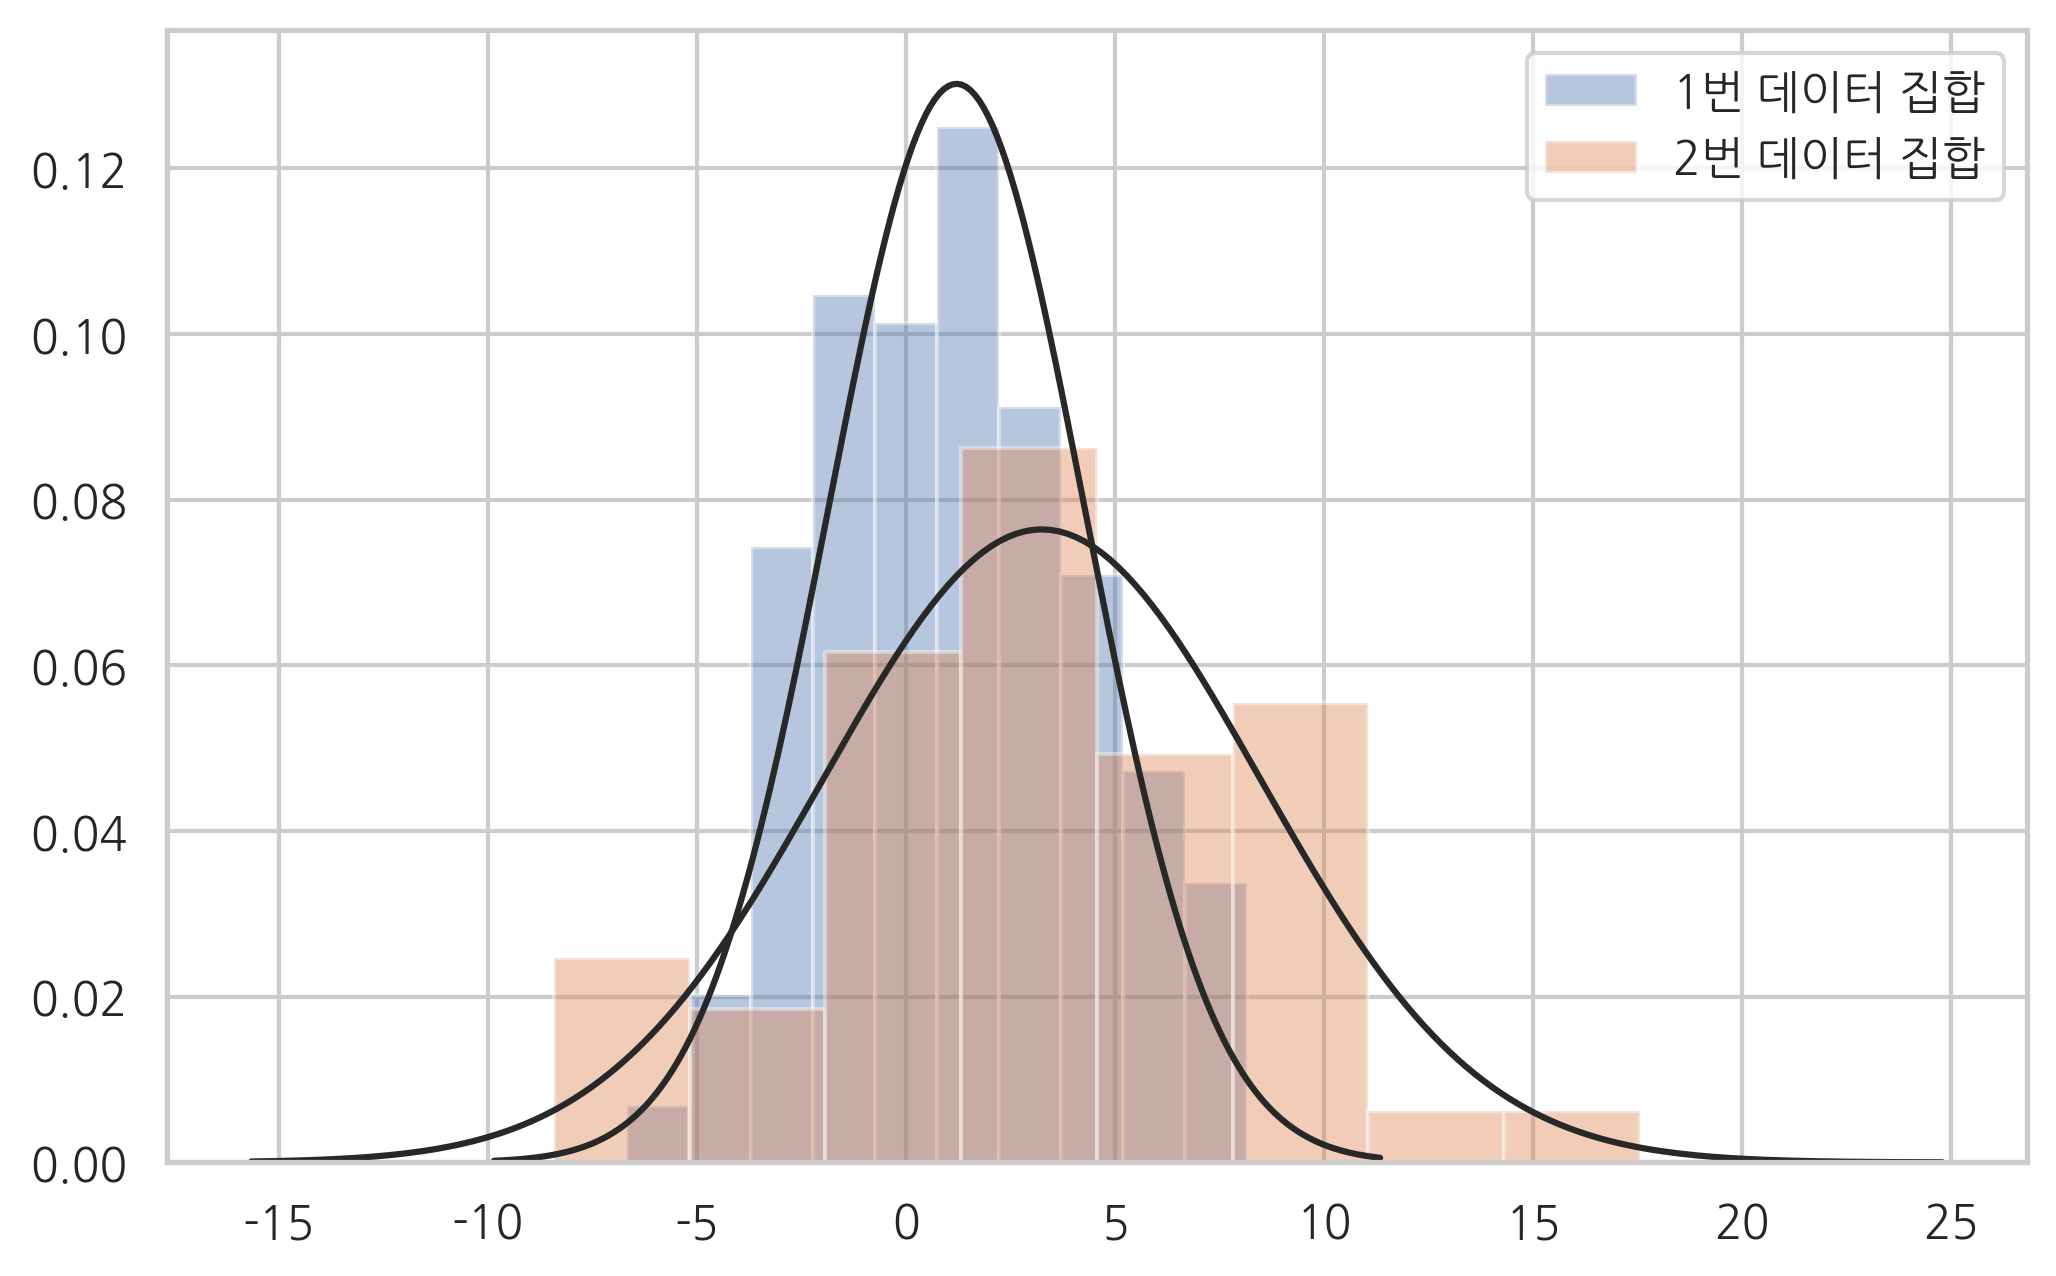

In [410]:
n1 = 200
n2 = 50

np.random.seed(0)
x1 = sp.stats.norm(1,3).rvs(n1)
x2 = sp.stats.norm(4,6).rvs(n2)

ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label='1번 데이터 집합')
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label='2번 데이터 집합')
plt.legend()
plt.show()

In [411]:
sp.stats.ks_2samp(x1, x2)

KstestResult(statistic=0.255, pvalue=0.009610378185668456)

In [414]:
rv = sp.stats.norm(1,2).rvs(10000, random_state=0)

In [415]:
sp.stats.ks_2samp(x1, rv)

KstestResult(statistic=0.1495, pvalue=0.00027436269449210293)

In [423]:
x1 = sp.stats.uniform().rvs(10, random_state=0)

sp.stats.ks_2samp(x1, rv)

KstestResult(statistic=0.4972, pvalue=0.008347274897892887)